In [1]:
import pandas as pd
import numpy as np


To - Do 1 Implementation of Sigmoid Function

In [5]:

def logistic_function(x):
 """
 Computes the logistic function applied to any value of x.
 Arguments:
 x: scalar or numpy array of any size.
 Returns:
 y: logistic function applied to x.
 """
 y = (1/(1 + np.exp(-x)))
 return y

In [6]:

def test_logistic_function():
 """
 Test cases for the logistic_function.
 """
 # Test with scalar input
 x_scalar = 0
 expected_output_scalar = round(1 / (1 + np.exp(0)), 3) # Expected output: 0.5
 assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"
 # Test with positive scalar input
 x_pos = 2
 expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
 assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"
 # Test with negative scalar input
 x_neg = -3
 expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
 assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"
 #Test with numpy array input
 x_array = np.array([0, 2, -3])
 expected_output_array = np.array([0.5, 0.881, 0.047])
 #use np.round to round the array element-wise and compare
 assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
 print("All test cases passed!")
test_logistic_function()



All test cases passed!


To do 2 Implementation of log-loss fxn

In [7]:
def log_loss(y_true, y_pred):
 """
 Computes the log loss for true target value y ={0 or 1} and predicted target
 value y' inbetween {0-1}.
 Arguments:
 y_true: true target value {0 or 1}
 y_pred: predicted target value {0-1}
 Returns:
 loss (float): loss/error value.
 """
 #Ensure y_pred is clipped to avoid log(0)
 y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
 loss = -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))
 return loss


In [8]:
#veryfying the intution betn the log-loss fxn (the loss value should be
# minimum when our predicted probability values are closer to true target value)
y_true, y_pred = 0, 0.1
print(f" log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")
y_true, y_pred = 1, 0.9
print(f" log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")



 log loss(0, 0.1) ==> 0.10536051565782628
 log loss(1, 0.9) ==> 0.10536051565782628


In [9]:
#test case for log - loss fxn
def test_log_loss():
  """
  Test case for the log_loss function
  """
  #Test case 1 : Perfece Prediction (y_true = 1, y_pred = 1)
  y_true = 1
  y_pred = 1
  expected_loss = 0.0 #log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction(y_true=1, y_pred= 1)"
  #Test case 2 : Perfect prediction (y_true = 0, y_pred = 0)
  y_true = 0
  y_pred = 0
  expected_loss = 0.0 #log loss is 0 for perfect prediction
  assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"
  #Test case 3 : Incorrect Prediction (y_true = 1, y_pred = 0)
  y_true = 1
  y_pred = 0
  try:
    log_loss(y_true, y_pred)#this should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  #Test case 4: Incorrect Prediction (y_true = 0, y_pred = 1)
  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred)#this should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  #Test Case 5 : Partially correct prediction
  y_true = 1
  y_pred = 0.8
  expected_loss = - (1 * np.log(0.8)) - (0 * np.log(0.2)) #~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol= 1e-6), "Test failed for partially correct prediction(y_true=1, y_pred=0.8)"
  y_true = 0
  y_pred = 0.2
  expected_loss = - (0 * np.log(0.2)) - ( 1 * np.log(0.8)) #~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol= 1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"
  print("All test cases passed!")
test_log_loss()

All test cases passed!


To Do 3 Implementation of cost function

In [10]:
def cost_function(y_true, y_pred):
 """
 Computes the log loss for inputs true value {0 or 1} and predicted value (between 0 and 1)
 Args:
 y_true (array_like, shape(n,)): array of true values (0 or 1)
 y_pred (array_like, shape(n,)): array of predicted values (probability of y_pred being 1)
 Returns:
 cost (float): non negative cost corresponding to y_true and y_pred
 """
 assert len(y_true) == len(y_pred), "length of true values and length of predicted values donot match"
 n = len(y_true)
 loss_vec= log_loss(y_true, y_pred)
 cost= np.sum(loss_vec)/n
 return cost

In [11]:
#testing the cost function
def test_cost_function():
  #Test case 1 : Simple example with known expected cost
  y_true = np.array([1, 0, 1])
  y_pred = np.array([0.9, 0.1, 0.8])
  #Expected output: Manually calculate cost of these values
  #log_loss(y_true, y_pred) for each example
  expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
                   -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
                   -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8))/3
  #call the cost fxn to get the result
  result = cost_function(y_true, y_pred)
  #assert that the result is close to the expected cost with a tolerance of 1e-6
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")
test_cost_function()





Test passed for simple case!


To - Do - 4 Implementation of Cost Function for logistic/ Sigmoid regression

In [12]:
#Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
  """
  Computes the cost function, given data and model parameters.
  Args:
  X (ndarray, shape (m,n)): data on features, m observations with n features.
  y (array_like, shape (m,)): array of true values of target (0 or 1).
  w (array_like, shape (n,)): weight parameters of the model.
  b (float): bias parameter of the model.
  Returns:
  cost (float): nonnegative cost corresponding to y and y_pred.
  """
  n, d = X.shape
  assert len(y) == n, "Number of feature observations and number of target observations do not match"
  assert len(w) == d, "Number of features and number of weight parameters do not match"
  #compute z using np.dot
  z = np.dot(X, w) + b
  #compute predictions using logistic function(sigmoid)
  y_pred = logistic_function(z)
  #compute cost using cost fxn
  cost = cost_function(y, y_pred)
  return cost
#Testing the function
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"Cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = cost_function_logreg(X, y, w, b)")


Cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = cost_function_logreg(X, y, w, b)


To-Do-5 Computing Gradients for Sigmoid Regression

In [13]:
def compute_gradient(X, y, w, b):
 """
 Computes gradients of the cost function with respect to model parameters.
 Args:
 X (ndarray, shape (n,d)): Input data, n observations with d features
 y (array_like, shape (n,)): True labels (0 or 1)
 w (array_like, shape (d,)): Weight parameters of the model
 b (float): Bias parameter of the model
 Returns:
 grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight
 parameters
 grad_b (float): Gradient of the cost function with respect to the bias parameter
 """
 n, d = X.shape #X has shape (n, d)
 assert len(y) == n , f"Expected y to have {n} elements, but got {len(y)}"
 assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"
 #compute predictions using logistic function (sigmoid)
 z = np.dot(X, w) + b
 y_pred = logistic_function(z)
 #compute gradients
 grad_w = np.dot(X.T, (y_pred - y)) / n
 grad_b = np.sum( y_pred - y) / n
 return grad_w, grad_b


In [14]:
#Simple assertion test for compute_gradient function
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b=1
#assertion test
try:
  grad_w, grad_b = compute_gradient(X, y, w, b)
  print("Gradients computed successfully")
  print(f"grad_w = {grad_w}")
  print(f"grad_b = {grad_b}")
except AssertionError as e:
  print(f"Assertion error: {e}")

Gradients computed successfully
grad_w = [-4.99991649  4.99991649]
grad_b = 0.4999916492890759


To-Do-6 Gradient Descent for Sigmoid regression

In [15]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
  n, d = X.shape
  assert len(y) == n, "Number of observations in X and y do not match"
  assert len(w) == d, "Number of features in X and w do not match"
  cost_history = []
  params_history = []
  for i in range(n_iter):
    #compute gradients
    grad_w, grad_b = compute_gradient(X, y, w, b)
    #update weight and bias
    w = w - alpha * grad_w
    b = b - alpha * grad_b
    #compute cost
    cost = costfunction_logreg(X, y, w, b)
    #store cost and parameters
    cost_history.append(cost)
    params_history.append((w.copy(), b))
    #optionally print cost and parameters
    if show_cost and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: Cost = {cost:.6f}")
    if show_params and (i % 100 == 0 or i == n_iter - 1):
      print(f"Iteration {i}: w = {w}, b = {b:.6f}")
  return w, b, cost_history, params_history
#Test the gradient descent fxn with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 100000
#perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost= True, show_params=False)
#print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"final cost: {cost_history[-1]:.6f}")



Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 1000: Cost = 0.460524
Iteration 1100: Cost = 0.444052
Iteration 1200: Cost = 0.428497
Iteration 1300: Cost = 0.413797
Iteration 1400: Cost = 0.399895
Iteration 1500: Cost = 0.386736
Iteration 1600: Cost = 0.374272
Iteration 1700: Cost = 0.362457
Iteration 1800: Cost = 0.351248
Iteration 1900: Cost = 0.340607
Iteration 2000: Cost = 0.330495
Iteration 2100: Cost = 0.320880
Iteration 2200: Cost = 0.311730
Iteration 2300: Cost = 0.303016
Iteration 2400: Cost = 0.294710
Iteration 2500: Cost = 0.286789
Iteration 2600: Cost = 0.279228
Iteration 2700: Cost = 0.272007
Iteration 2800: Cost = 0.265104
Iteration 2900: Cost = 0.258502
Iteration 3000: Cost = 0.252182
Iteration 3100: Cost

In [18]:
#simple assertion test for gradient_descent
def test_gradient_descent():
  X = np.array([[0.1, 0.2], [-0.1, 0.1]])
  y = np.array([1, 0])
  w = np.zeros(X.shape[1])
  b = 0.0
  alpha = 0.1
  n_iter = 100
  #run gradient descent
  w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False)
  #Assertions
  assert len(cost_history) == n_iter, "Number of iterations does not match the cost history length"
  assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print("All tests passed")
test_gradient_descent()

All tests passed


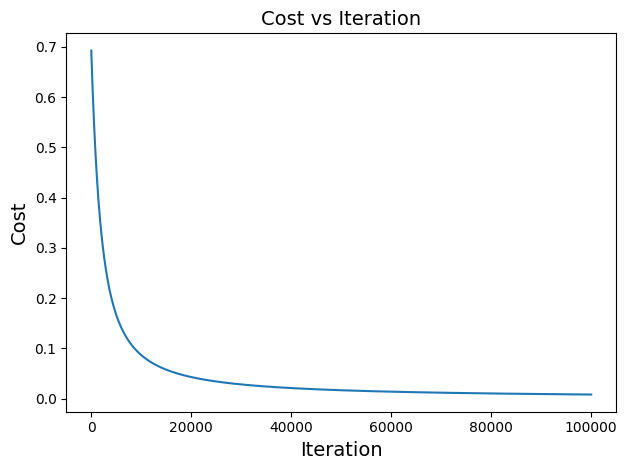

In [17]:
import matplotlib.pyplot as plt
#plotting cost over iteration during gradient descent
plt.figure()
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

To-Do-7 Decision/ Prediction function

In [16]:
def prediction(X, w, b, threshold=0.5):
  #compute the predicted probabilities using the logistic function
  z = np.dot(X, w) + b
  y_test_prob = logistic_function(z)
  #classify based on threshold
  y_pred = (y_test_prob >= threshold).astype(int)
  return y_pred

In [19]:
#Assertion test for prediction function
def test_prediction():
  X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
  w_test = np.array([1.0, -1.0])
  b_test = 0.0
  threshold = 0.5
  #updated expected output
  expected_output = np.array([0, 1, 1])
  #call the prediction function
  y_pred = prediction(X_test, w_test, b_test, threshold)
  #assert that the output matches the expected output
  assert np.array_equal(y_pred, expected_output),f"Expected {expected_output}, but got {y_pred}"
  print("Test passed")
test_prediction()

Test passed


To-Do- 8

In [20]:
def evaluate_classification(y_true, y_pred):
  #initialize confusion matrix components
  TP = np.sum((y_true == 1) & (y_pred == 1))
  TN = np.sum((y_true == 0) & (y_pred == 0))
  FP = np.sum((y_true == 0) & (y_pred == 1))
  FN = np.sum((y_true == 1) & (y_pred == 0))
  #confusion matrix
  confusion_matrix = np.array([[TN, FP],
                               [FN, TP]])
  #precision, recall and F1 -score
  precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
  recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
  f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall)> 0 else 0.0
  #metrics dictionary
  metrics = {
      "confusion_matrix": confusion_matrix,
      "precision": precision,
      "recall": recall,
      "f1_score": f1_score
  }
  return confusion_matrix, precision, recall, f1_score


3.2 putting helper fxn to action

basic operations

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url, names=columns)


Basic data cleaning

In [22]:
#Data cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Summary Statistics

In [23]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Train test split and Standard Scaling of data

In [24]:
#Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#standarize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Training of the sigmoid regression


Training Logistic regression model
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


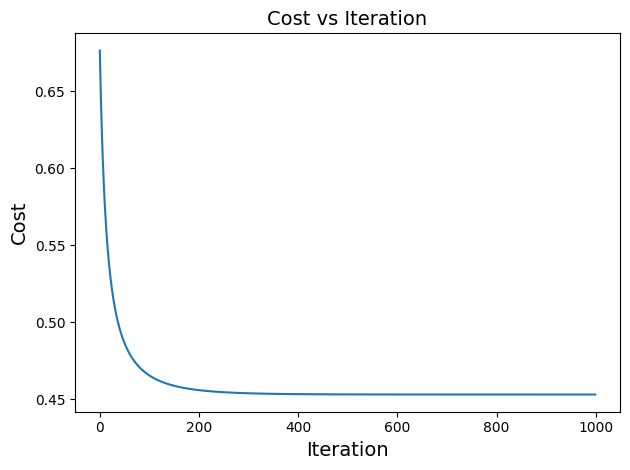

In [25]:
#initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000
# train model
print("\nTraining Logistic regression model")
w, b, cost_history, params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)
#plot cost history
plt.figure()
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()


4. Evaluating train and test performance on cost value

In [26]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

#Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain cost: {train_cost:.4f}")
print(f"Test cost: {test_cost:.4f}")


Train cost: 0.4531
Test cost: 0.5146


5. Evaluation on various metrics for classification


Test accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1 Score: 0.55


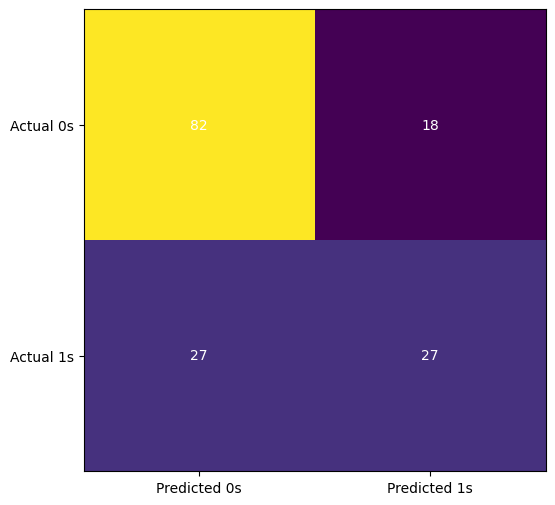

In [27]:
#accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest accuracy: {test_accuracy:.2f}%")
#evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
#visualizing confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, confusion_matrix[i,j], ha ='center', va='center', color='white')
plt.show()